<a href="https://colab.research.google.com/github/Roshinivemuluri/Roshini-data-analytics-training/blob/main/Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')

In [5]:
# prompt: clean the data

import pandas as pd
# Check for missing values
print(data.isnull().sum())

# Fill missing values in 'age' with the median age
data['age'].fillna(data['age'].median(), inplace=True)

# Fill missing values in 'gender' with the mode gender
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

# Drop rows with missing values in other columns (if necessary)
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)


# Example: Convert 'date' column to datetime objects if it's not already.
# Handle errors gracefully.
try:
    data['date'] = pd.to_datetime(data['date'])
except ValueError as e:
    print(f"Error converting 'date' column: {e}")
    # Handle the error, e.g., by dropping the column or attempting a different conversion method.


# Check data types of each column
print(data.dtypes)

# Display the cleaned data
print(data.head())


id                          0
name                        0
date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       63
body_camera                 0
dtype: int64
id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                                 int64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera          

<ipython-input-5-ae515f37db22>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-5-ae515f37db22>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [6]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53,male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31,male,W,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,34,male,W,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48,male,W,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28,male,B,Oshkosh,WI,False,attack,Car,True


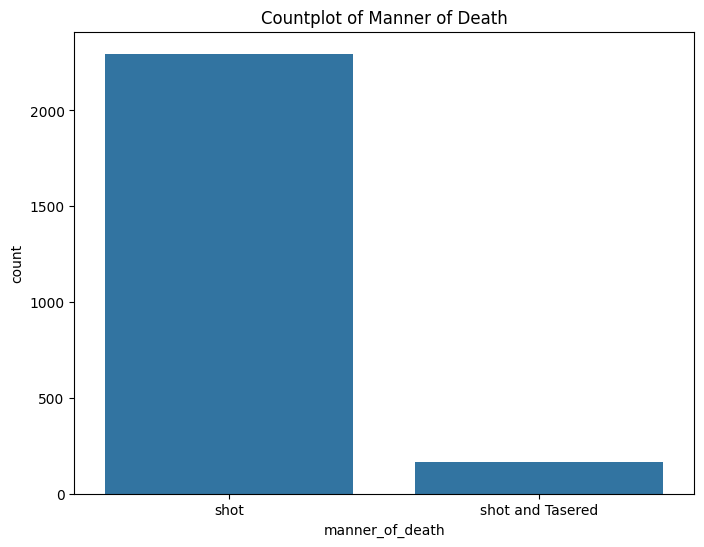

<ipython-input-11-30e68b6aea6b>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], kde=True)  # Include Kernel Density Estimation (KDE)


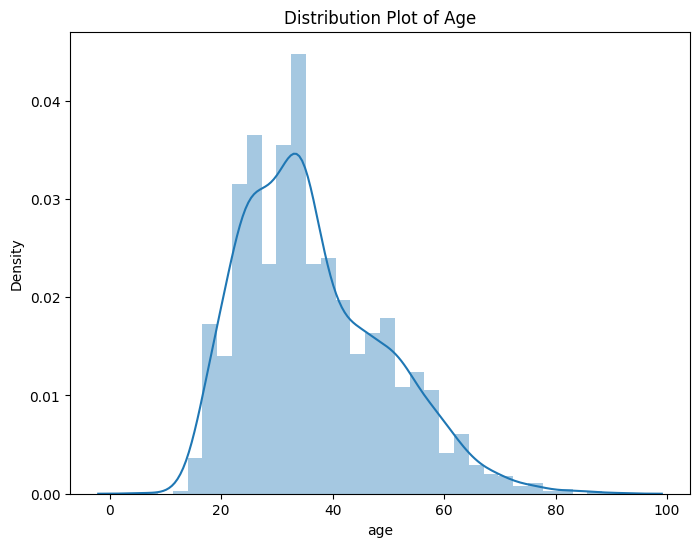

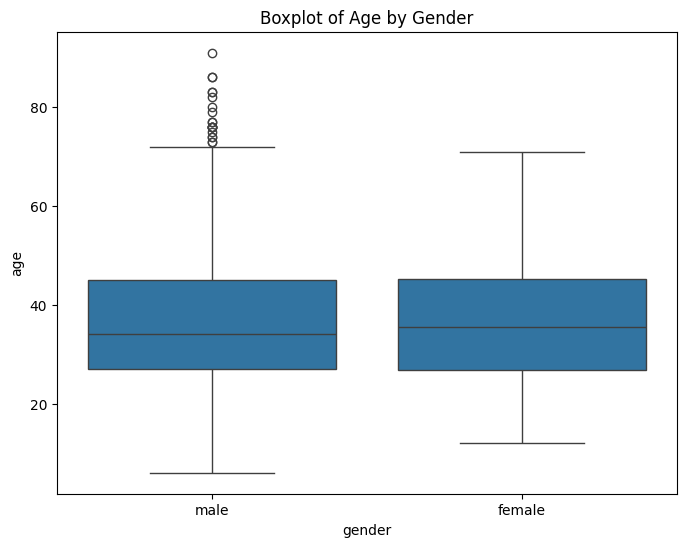

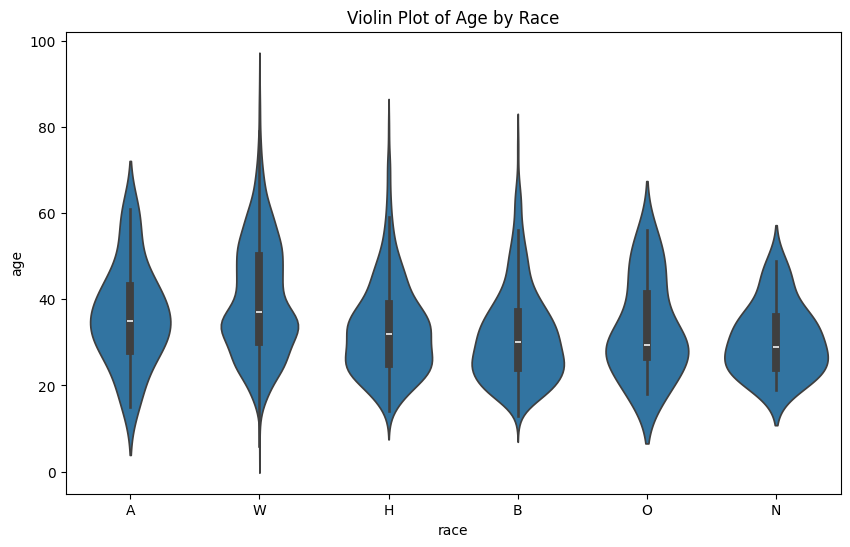

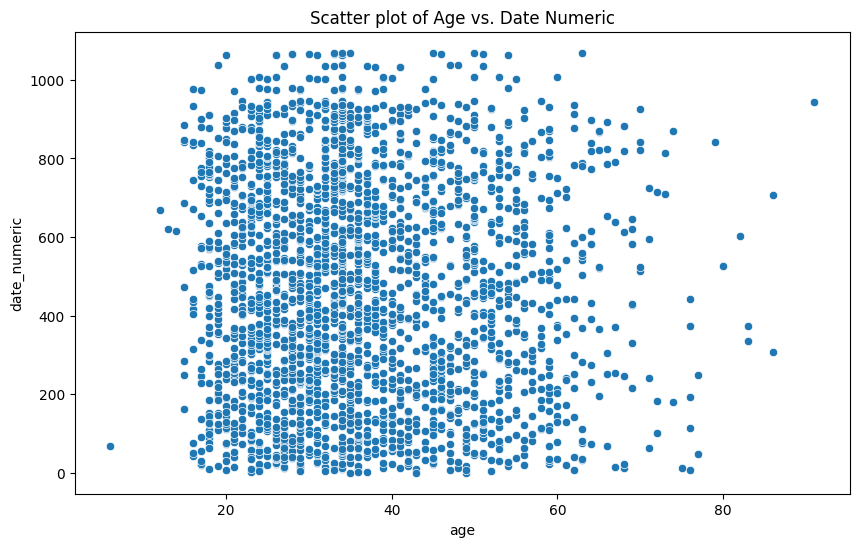

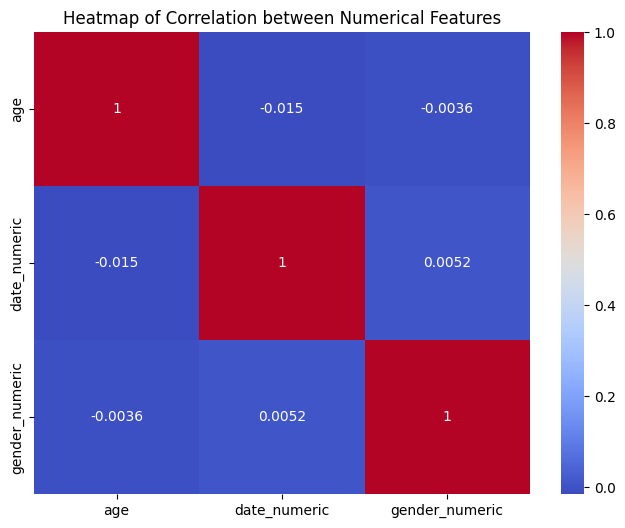

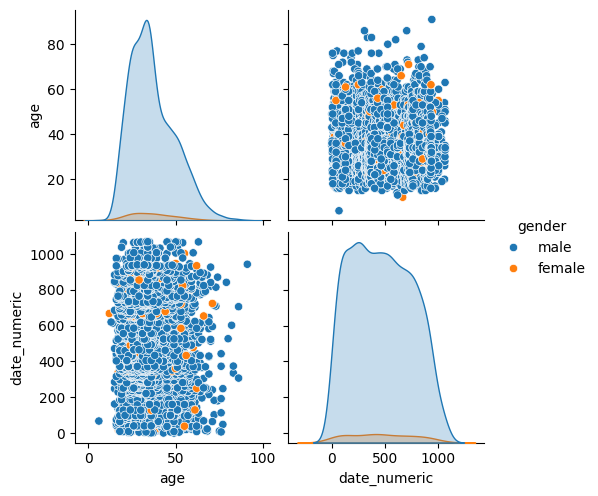

In [11]:
# prompt: Using dataframe data: 7 different graphs using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame

# 1. Countplot of manner of death
plt.figure(figsize=(8, 6))
sns.countplot(x='manner_of_death', data=data)
plt.title('Countplot of Manner of Death')
plt.show()

# 2. Distribution plot of age
plt.figure(figsize=(8, 6))
sns.distplot(data['age'], kde=True)  # Include Kernel Density Estimation (KDE)
plt.title('Distribution Plot of Age')
plt.show()


# 3. Boxplot of age by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('Boxplot of Age by Gender')
plt.show()

# 4. Violin plot of age by race
plt.figure(figsize=(10, 6))
sns.violinplot(x='race', y='age', data=data)
plt.title('Violin Plot of Age by Race')
plt.show()

# 5. Scatter plot of age vs. date_numeric
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='date_numeric', data=data)
plt.title('Scatter plot of Age vs. Date Numeric')
plt.show()


# 6. Heatmap of correlation between numerical features
numerical_cols = ['age', 'date_numeric', 'gender_numeric']
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between Numerical Features')
plt.show()

#7. Pairplot for selected numerical and categorical features
sns.pairplot(data, vars=['age', 'date_numeric'], hue='gender') # pairplot of numerical features colored by gender
plt.show()


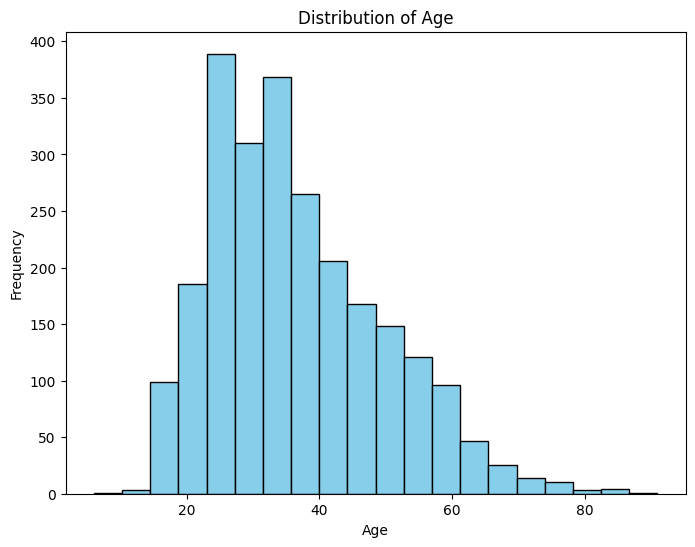

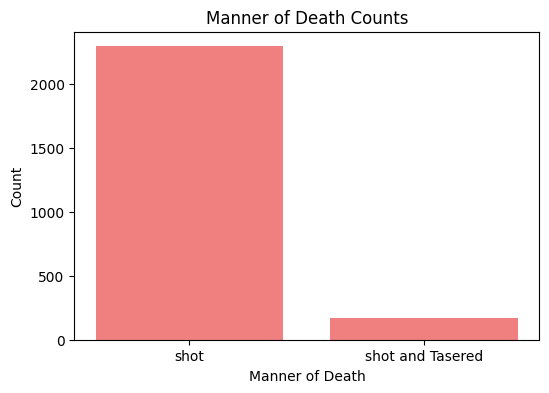

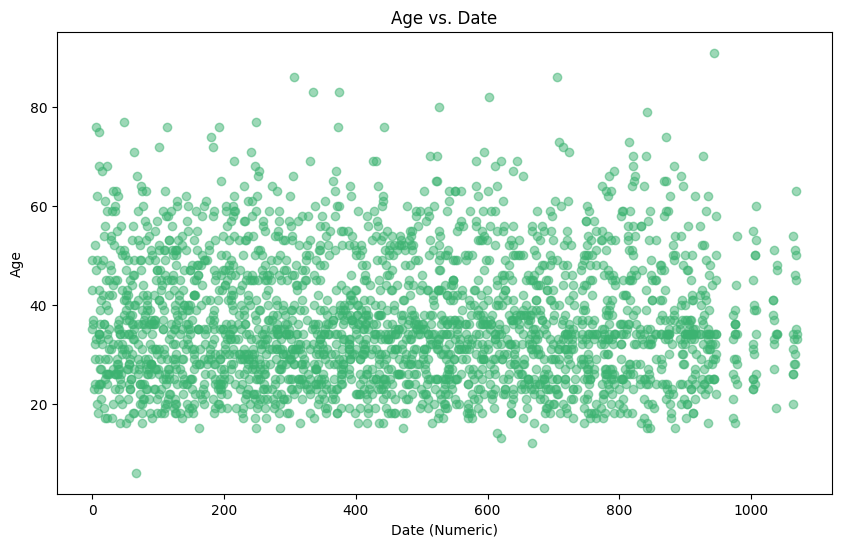

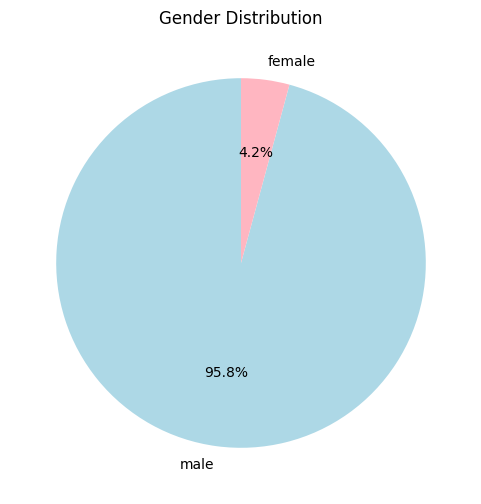

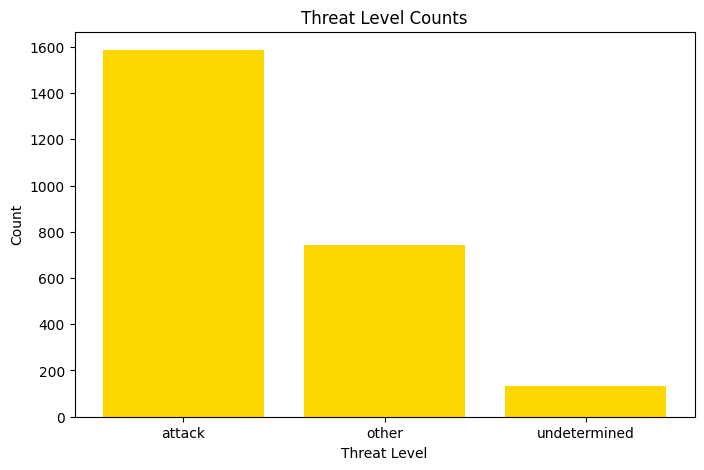

TypeError: float() argument must be a string or a real number, not 'Period'

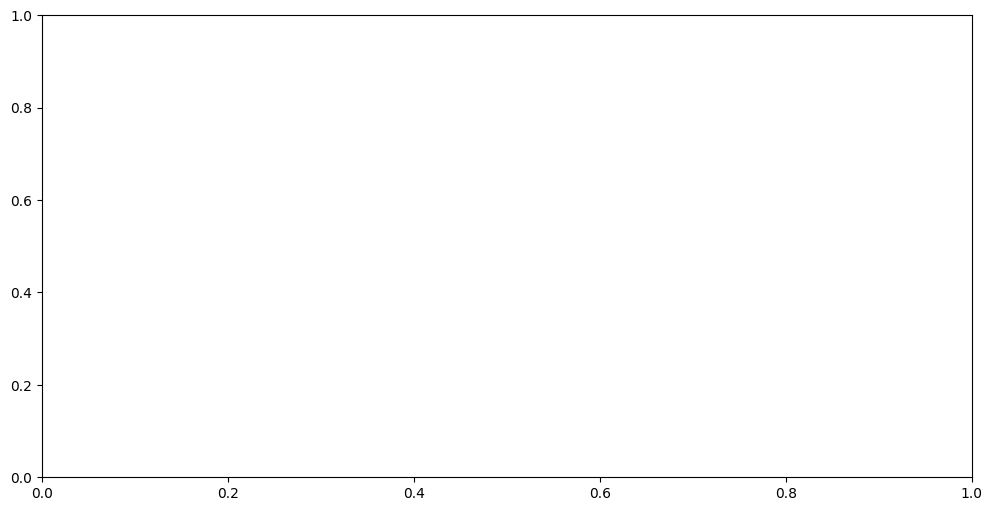

In [10]:
# prompt: Using dataframe data: 7 different graphs using matplotlib

import matplotlib.pyplot as plt

# Assuming 'data' is your Pandas DataFrame

# 1. Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


# 2. Bar chart of Manner of Death
manner_of_death_counts = data['manner_of_death'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(manner_of_death_counts.index, manner_of_death_counts.values, color='lightcoral')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Manner of Death Counts')
plt.show()


# 3. Scatter plot of Age vs. Date (numeric)
plt.figure(figsize=(10, 6))
plt.scatter(data['date_numeric'], data['age'], alpha=0.5, color='mediumseagreen')
plt.xlabel('Date (Numeric)')
plt.ylabel('Age')
plt.title('Age vs. Date')
plt.show()


# 4. Pie chart of Gender
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.show()


# 5. Bar chart of Threat Level
threat_level_counts = data['threat_level'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(threat_level_counts.index, threat_level_counts.values, color='gold')
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.title('Threat Level Counts')
plt.show()


# 6. Line plot of number of incidents over time
data['date'] = pd.to_datetime(data['date']) #ensure date column is datetime
incidents_over_time = data.groupby(data['date'].dt.to_period('M')).size().reset_index(name='counts')
plt.figure(figsize=(12,6))
plt.plot(incidents_over_time['date'], incidents_over_time['counts'])
plt.xlabel("Month")
plt.ylabel("Number of incidents")
plt.title("Number of incidents over time")
plt.show()


# 7. Boxplot of age by gender
plt.figure(figsize=(6,4))
data.boxplot(column='age', by='gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.suptitle("") # remove default boxplot title
plt.show()

In [9]:
# prompt: Using dataframe data: dependancy for city and state

# Assuming you want to see the dependency between city and state.
#  This can be visualized as a table of counts of unique city-state combinations.

import pandas as pd

#Group data by city and state, count occurences, and sort by counts
city_state_counts = data.groupby(['city', 'state']).size().reset_index(name='counts').sort_values('counts', ascending=False)

#Display the dependency.
city_state_counts


,city,state,counts
786,Los Angeles,CA,39
1059,Phoenix,AZ,31
619,Houston,TX,25
257,Chicago,IL,23
740,Las Vegas,NV,20
...,...,...,...
695,Kingsbury,TX,1
694,Kings County,CA,1
181,Buffalo,NY,1
692,King George,VA,1


In [8]:
# prompt: Using dataframe data: association for gender age

# Calculate the correlation between age and gender.
# Since gender is categorical, we'll use a method appropriate for categorical data.
# One common approach is to convert gender to numerical values and then calculate the correlation.
# Another approach is to calculate the mean age for each gender and compare them.

# Convert gender to numerical representation
data['gender_numeric'] = data['gender'].astype('category').cat.codes

# Calculate the correlation
correlation = data['age'].corr(data['gender_numeric'])

print(f"Correlation between age and gender: {correlation}")

# Calculate the mean age for each gender
mean_age_by_gender = data.groupby('gender')['age'].mean()

print("\nMean age by gender:")
mean_age_by_gender


Correlation between age and gender: -0.003570843698679043

Mean age by gender:


,age
gender,
female,36.692308
male,36.465028


In [7]:
# prompt: Using dataframe data: corelation for date and age

import pandas as pd

# Convert the 'date' column to datetime objects if it's not already
data['date'] = pd.to_datetime(data['date'])

# Extract numerical representation of dates (e.g., number of days since a reference date)
data['date_numeric'] = (data['date'] - data['date'].min()).dt.days

# Calculate the correlation between the numerical date representation and age
correlation = data['date_numeric'].corr(data['age'])

print(f"The correlation between date and age is: {correlation}")


The correlation between date and age is: -0.014851619920682851


In [ ]:
# prompt: explanation for above codes

import pandas as pd
This code performs data cleaning, exploratory data analysis (EDA), and some basic statistical analysis on a dataset of police killings in the US, likely loaded from a CSV file named 'PoliceKillingsUS.csv'. Let's break down the code section by section:

**1. Data Loading and Cleaning:**

* **Import Libraries:** Imports necessary libraries like pandas for data manipulation, numpy for numerical operations, seaborn and matplotlib for visualization.
* **Data Loading:** Reads the CSV file into a pandas DataFrame called `data`. The `encoding='latin-1'` argument is used because the file likely contains characters outside the standard UTF-8 encoding.
* **Missing Value Handling:**
    * `data.isnull().sum()`: Checks for missing values in each column and prints the count of missing values for each column.
    * `data['age'].fillna(data['age'].median(), inplace=True)`: Fills missing ages with the median age of the available data.
    * `data['gender'].fillna(data['gender'].mode()[0], inplace=True)`: Fills missing gender values with the most frequent gender (mode).
    * `data.dropna(inplace=True)`: Removes rows with any remaining missing values.  Use with caution - this can discard valuable data.
    * `data.drop_duplicates(inplace=True)`: Removes duplicate rows.
* **Data Type Conversion:** Attempts to convert the 'date' column to datetime objects using `pd.to_datetime()`.  Includes a `try-except` block to handle potential `ValueError` if the date format is inconsistent, providing more robust code.
* **Data Type Check:**  `data.dtypes` displays data types of each column.
* **Data Display:** `data.head()` shows the first few rows of the cleaned data.

**2. Exploratory Data Analysis (EDA) with Seaborn:**

This section uses Seaborn to create several visualizations to understand the data:

* **`countplot`:** Shows the frequency of each category in the 'manner_of_death' column.
* **`distplot`:** Creates a histogram and kernel density estimate (KDE) to visualize the distribution of age.
* **`boxplot`:** Shows the distribution of age for each gender, highlighting median, quartiles, and outliers.
* **`violinplot`:** Similar to a boxplot, but also shows the probability density of age within each race group.
* **`scatterplot`:** Displays the relationship between age and a numerical representation of the date.
* **`heatmap`:** Visualizes the correlation matrix between numerical features.
* **`pairplot`:** Shows pairwise relationships between selected variables, colored by gender.


**3.  Additional EDA with Matplotlib:**

This section complements the Seaborn plots with additional visualizations:


* **`hist`:** Creates a histogram for the age distribution.
* **`bar`:** Generates bar charts to show the counts of different categories (manner of death, threat level, gender).
* **`scatter`:** Creates a scatter plot for the relationship between age and a numerical date representation.
* **`pie`:** Makes a pie chart for the gender distribution.
* **`line`:** Plots the number of incidents over time.
* **`boxplot`:** Creates a boxplot of age by gender, similar to the seaborn version but slightly different styling.

**4. Dependency analysis**

* Shows a table summarizing the relationship between the city and state columns from the dataset.

**5. Correlation Analysis**

* **Gender and Age:** Calculates and prints the correlation between age and gender (after converting gender to numerical codes).
* **Mean Age by Gender:** Calculates and displays the average age for each gender group.


**6. Date and Age correlation**

Calculates and prints the correlation between a numerical representation of the date and age. The date is converted to a numerical representation by calculating the number of days since the earliest date in the data.




**Overall:**

The code provides a comprehensive analysis of the provided dataset. It starts by cleaning the data to handle missing values and duplicates. Then, it explores the data's distributions and relationships between variables through a variety of visualizations using both Seaborn and Matplotlib. Finally, it calculates some correlations to examine relationships between specific variables.  The code is well-structured and reasonably comprehensive.  The inclusion of more sophisticated statistical tests would increase its analytical value.


In [ ]:
# prompt: explanation for above graphs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for data loading and cleaning) ...

# Assuming 'data' is your pandas DataFrame

# Explanations for the graphs:

# 1. Countplot of manner of death:  This graph shows the frequency of each manner of death in the dataset (shot, shot and tasered, etc.). It helps you see which manner of death is most common.

# 2. Distribution plot of age:  This visualizes the distribution of ages of individuals in the dataset.  The kernel density estimate (KDE) provides a smooth representation of the distribution, while the histogram shows the counts within specific age ranges.  This helps understand the age demographics.

# 3. Boxplot of age by gender: This graph displays the distribution of age for males and females.  It helps you see the median age, quartiles (25th, 75th percentiles), and outliers for each gender.  You can compare the age distributions between genders.

# 4. Violin plot of age by race:  Similar to a box plot, but it also shows the density of age distribution within each race. It provides a richer understanding of the age distribution across different racial groups.

# 5. Scatter plot of age vs. date_numeric: This plot displays the relationship between age and the numerical representation of the date.  Look for any patterns or trends.  Does age appear to correlate with the date of the incident?

# 6. Heatmap of correlation between numerical features:  This shows the correlation coefficients between numerical features (age, date_numeric, gender_numeric).  A value of 1 indicates perfect positive correlation, -1 perfect negative correlation, and 0 no linear correlation.

# 7. Pairplot for selected numerical and categorical features: This creates a matrix of scatter plots and histograms for selected features (age, date_numeric).  It's colored by gender, allowing you to visualize how gender affects the relationship between those features.

# ... (Explanations for the Matplotlib graphs follow the same pattern) ...

# Dependency analysis between city and state:
#   The table `city_state_counts` provides a frequency count of how often each city-state combination occurs in the data. It helps to identify cities where incidents are more frequent and whether there are patterns related to state locations.


# Correlation between age and gender:
#   The calculated correlation shows the linear relationship between age and gender.  However, since gender is categorical, the correlation isn't always the most meaningful measure.  The mean age for each gender, presented below, can be a more useful comparison in this case.


# Correlation between date and age:
#   This correlation assesses whether there's a linear relationship between age and the date of the incident.  This helps to understand if there are temporal trends related to age.

# In general, these visualizations and calculations aim to provide insights into the relationships between various factors, such as age, gender, race, manner of death, date of the incident, and threat level, in the dataset on police killings.  Look for outliers, unusual patterns, and potentially significant trends to develop a deeper understanding of the data.